# Taller AE

Juan Navarro, jsnavarroa@unal.edu.co


[Adult Data Set](http://archive.ics.uci.edu/ml/datasets/Adult), from the UC Irvine Machine Learning Repository


In [36]:
adult <- read.csv("./data/UCI/adult.data", header=FALSE)
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
                  "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                  "hours-per-week", "native-country", "income")
head(adult)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# 1.

## 1.a.

| Variable | Tipo    |
|:---:|:---:|
| age | Radio |
| workclass | Nominal |
| fnlwgt | Radio |
| education | Nominal |
| education-num | Ordinal |
| marital-status | Nominal |
| occupation | Nominal |
| relationship | Nominal |
| race | Nominal |
| sex | Nominal |
| capital-gain | Radio |
| capital-loss | Radio |
| hours-per-week | Radio |
| native-country | Nominal |
| income | Ordinal |

In [48]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Defining the function, remove NA values by default
my.summary <- function(x, na.rm=TRUE){
  result <- c(Mean = mean(x, na.rm=na.rm),
              Median = median(x, na.rm=na.rm),
              #Var = var(x, na.rm=na.rm),
              SD = sd(x, na.rm=na.rm),
              Min = min(x, na.rm=na.rm),
              Max = max(x, na.rm=na.rm),
              Count = length(x))
}

# Defining the function, remove NA values by default
ordinal.summary <- function(x, na.rm=TRUE){
  result <- c(Mode = as.character(Mode(x)), 
              occurrences = length(which(x == Mode(x))))
}

# Identifying numeric columns
ind <- sapply(adult, is.numeric)
# Applying the summary function to numeric columns only
sapply(adult[, ind], my.summary)

sapply(adult[, !ind], ordinal.summary)

# Covariance
print("***  Correlation ***")
cor(adult[, ind])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
Mean,38.58165,189778.4,10.08068,1077.649,87.30383,40.43746
Median,37.00000,178356.0,10.00000,0.000,0.00000,40.00000
SD,13.64043,105550.0,2.57272,7385.292,402.96022,12.34743
Min,17.00000,12285.0,1.00000,0.000,0.00000,1.00000
Max,90.00000,1484705.0,16.00000,99999.000,4356.00000,99.00000
Count,32561.00000,32561.0,32561.00000,32561.000,32561.00000,32561.00000


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
Mode,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
occurrences,22696,10501,14976,4140,13193,27816,21790,29170,24720


[1] "***  Correlation ***"


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.00000000,-0.0766458679,0.03652719,0.0776744982,0.05777454,0.06875571
fnlwgt,-0.07664587,1.0000000000,-0.04319463,0.0004318858,-0.01025171,-0.01876849
education-num,0.03652719,-0.0431946327,1.00000000,0.1226301147,0.07992296,0.14812273
capital-gain,0.07767450,0.0004318858,0.12263011,1.0000000000,-0.03161506,0.07840862
capital-loss,0.05777454,-0.0102517117,0.07992296,-0.0316150630,1.00000000,0.05425636
hours-per-week,0.06875571,-0.0187684906,0.14812273,0.0784086154,0.05425636,1.00000000


# 1.


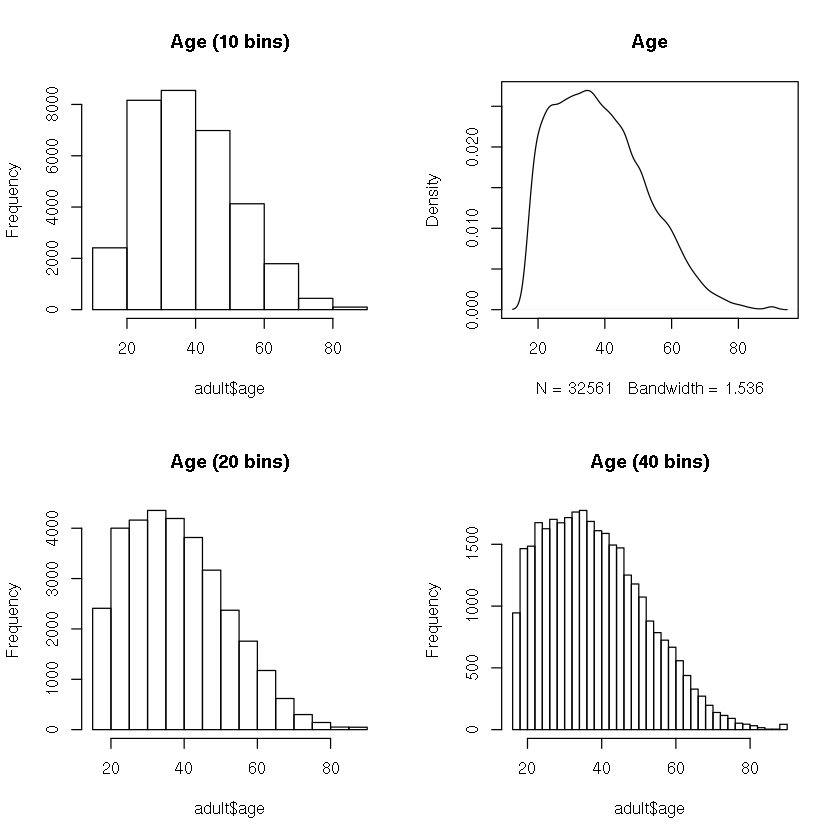

In [82]:
# Combine multiple plots
par(mfrow=c(2,2))

# Histograms and density plots
hist(adult$age, breaks=10, main="Age (10 bins)")
plot(density(adult$age), main="Age")
hist(adult$age, breaks=20, main="Age (20 bins)")
hist(adult$age, breaks=40, main="Age (40 bins)")

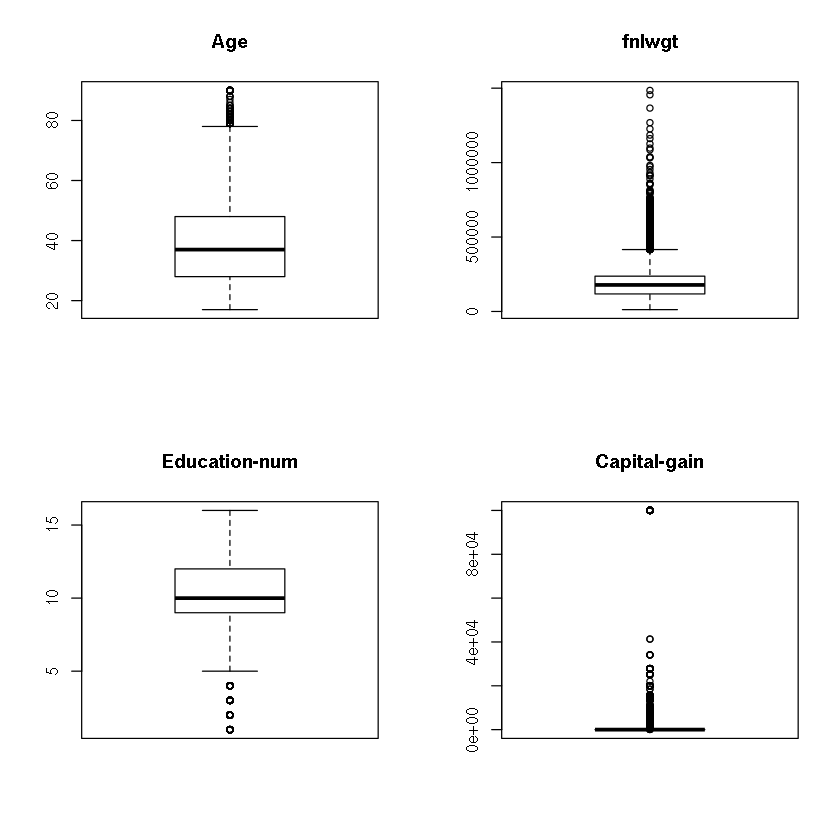

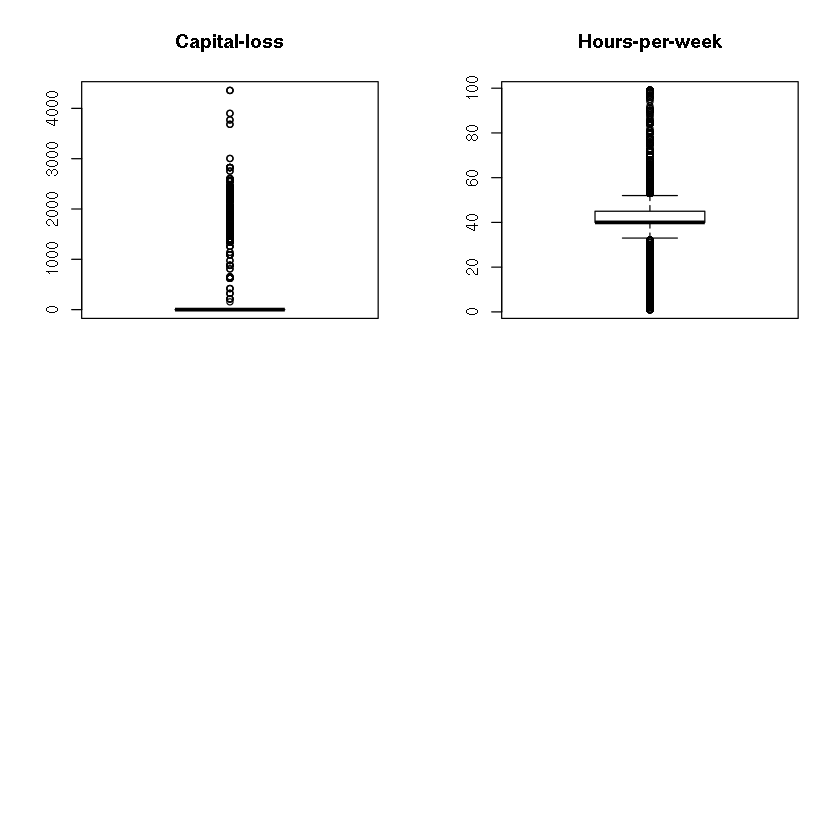

In [65]:
# Combine multiple plots
par(mfrow=c(2,2))

# Box plots
boxplot(adult$age, main="Age")
boxplot(adult$fnlwgt, main="fnlwgt")
boxplot(adult$'education-num', main="Education-num")
boxplot(adult$'capital-gain', main="Capital-gain")
boxplot(adult$'capital-loss', main="Capital-loss")
boxplot(adult$'hours-per-week', main="Hours-per-week")